In [ ]:
# Import necessary libraries
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kastrahl/Data-science/main/diabetes.csv')
#display the head (first 5 rows) og the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#newdf = df.drop(['SkinThickness','Pregnancies'], axis = 1)
newdf = df
newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newdf)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


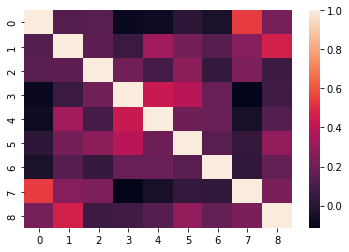

In [ ]:
# without pca 
sns.heatmap(scaled_data.corr())

here there is high correlation in 5 vs 4 and 7 vs 5 and 8 and 7 

In [ ]:
#Applying Principal Component Analysis we have taken n_components = 3, which means our final feature set will have 3 columns
pca = PCA(n_components = 4)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4'])
data_pca.head()

,PC1,PC2,PC3,PC4
0,-1.756947,-1.111743,0.208791,0.333705
1,1.507421,0.559406,-0.650628,0.229934
2,-0.650822,-1.929576,2.007740,-0.026129
3,1.587398,1.065075,-0.474442,-0.580654
4,-2.483374,2.359563,2.925515,3.936611


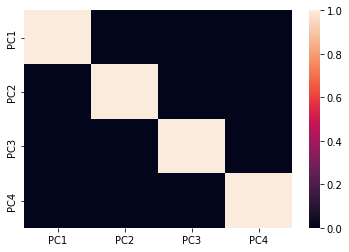

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


thus no correlation in the left 3 columns 

In [ ]:
# Splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
x = data_pca.iloc[:, :-2]
y = data_pca.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [ ]:
# Creating the SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

ValueError: ignored


TUTORIAL SVM CLASSIFICATION USING PCA 
> Indented block



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/kastrahl/Data-science/main/diabetes.csv')
col_names = list(df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

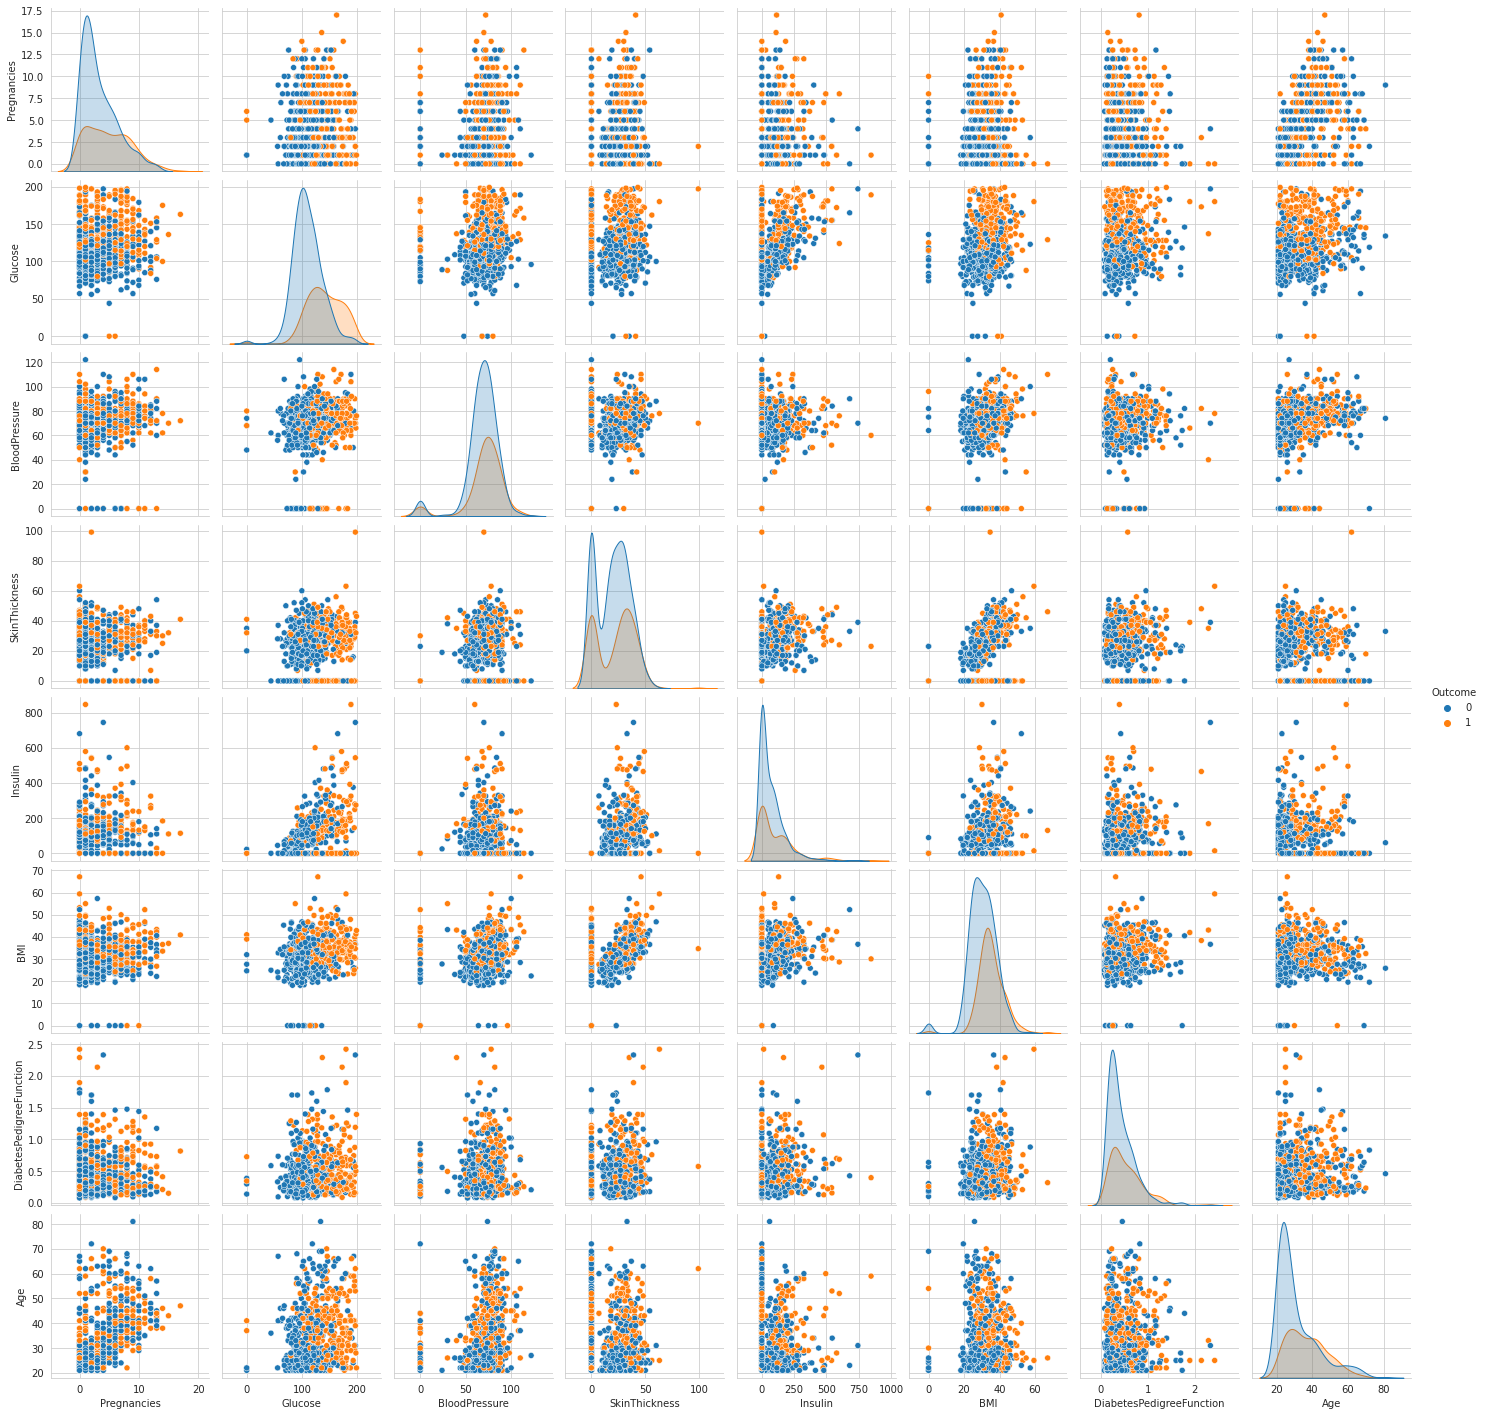

In [6]:
sns.pairplot(df, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


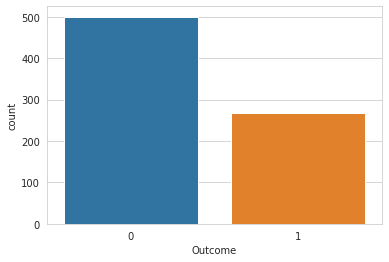

In [12]:
sns.countplot(df['Outcome'], label = "Count")

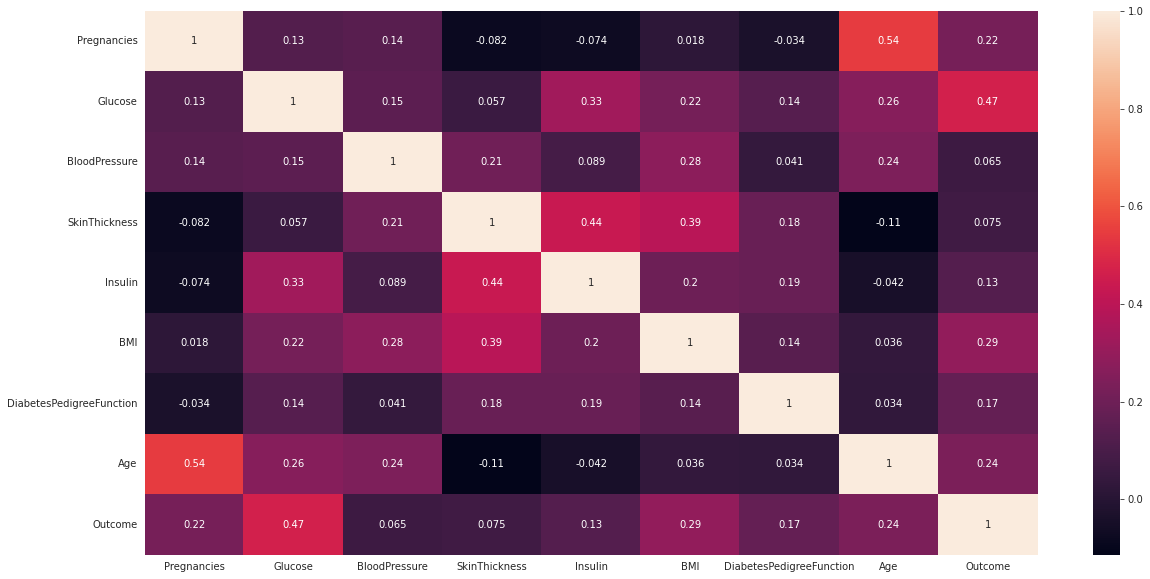

In [14]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'Outcome', data = df)

ValueError: ignored

<Figure size 720x576 with 0 Axes>